## **Time Series Analysis for Apple Stocks Using ARIMA or LSTM**

### Getting the data from Yahoo Finance

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stock_dataset = yf.download(tickers = "AAPL", period = "10y", interval = "1d")

[*********************100%***********************]  1 of 1 completed


In [3]:
stock_dataset.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-06-17,15.408571,15.560714,15.370000,15.428571,13.395039,259414400
2013-06-18,15.412857,15.532143,15.364643,15.420357,13.387906,195025600
2013-06-19,15.407143,15.416429,15.107143,15.107143,13.115976,310940000
2013-06-20,14.975000,15.213571,14.827500,14.887143,12.924973,357310800
2013-06-21,14.946071,15.000000,14.575000,14.767857,12.821410,481118400


In [4]:
stock_dataset.shape

(2519, 6)

### Visualizing the Apple Inc data

Text(0.5, 1.0, 'emphasis graph of apple stock price growth')

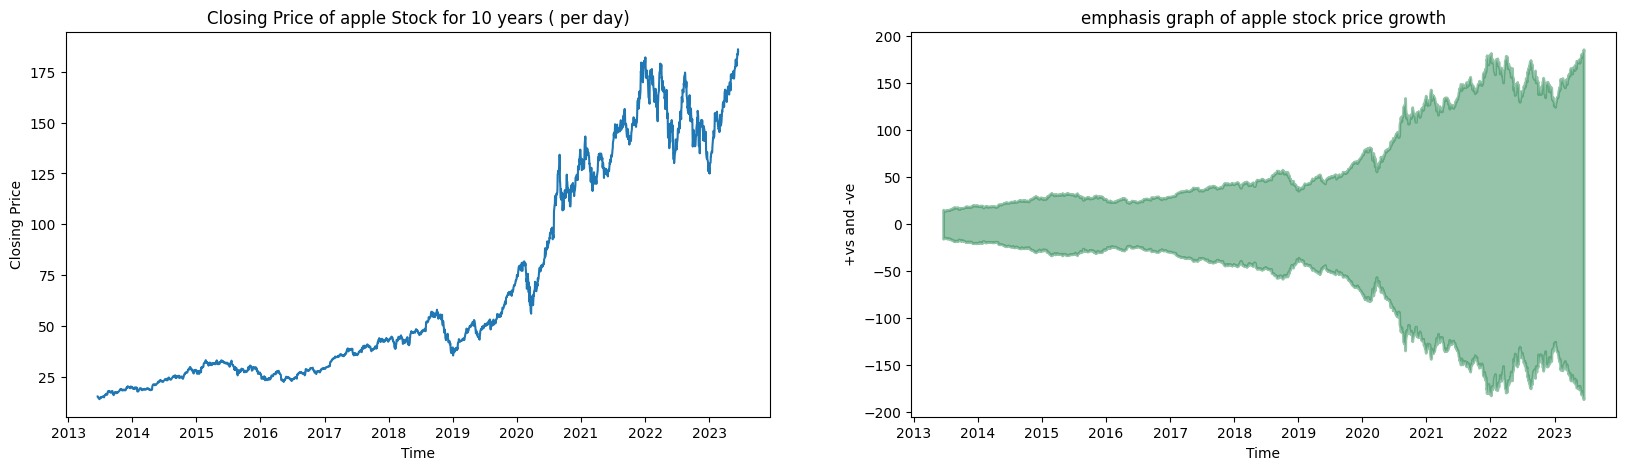

In [5]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(stock_dataset.index, stock_dataset['Close'])
plt.xlabel("Time")
plt.ylabel("Closing Price")
plt.title("Closing Price of apple Stock for 10 years ( per day)")
plt.subplot(1,2,2)
x = stock_dataset.index
y1 = stock_dataset["Close"]
plt.fill_between(x, y1=y1, y2=-y1, alpha = 0.5, linewidth=2, color="seagreen")
plt.xlabel("Time")
plt.ylabel("+vs and -ve")
plt.title("emphasis graph of apple stock price growth")


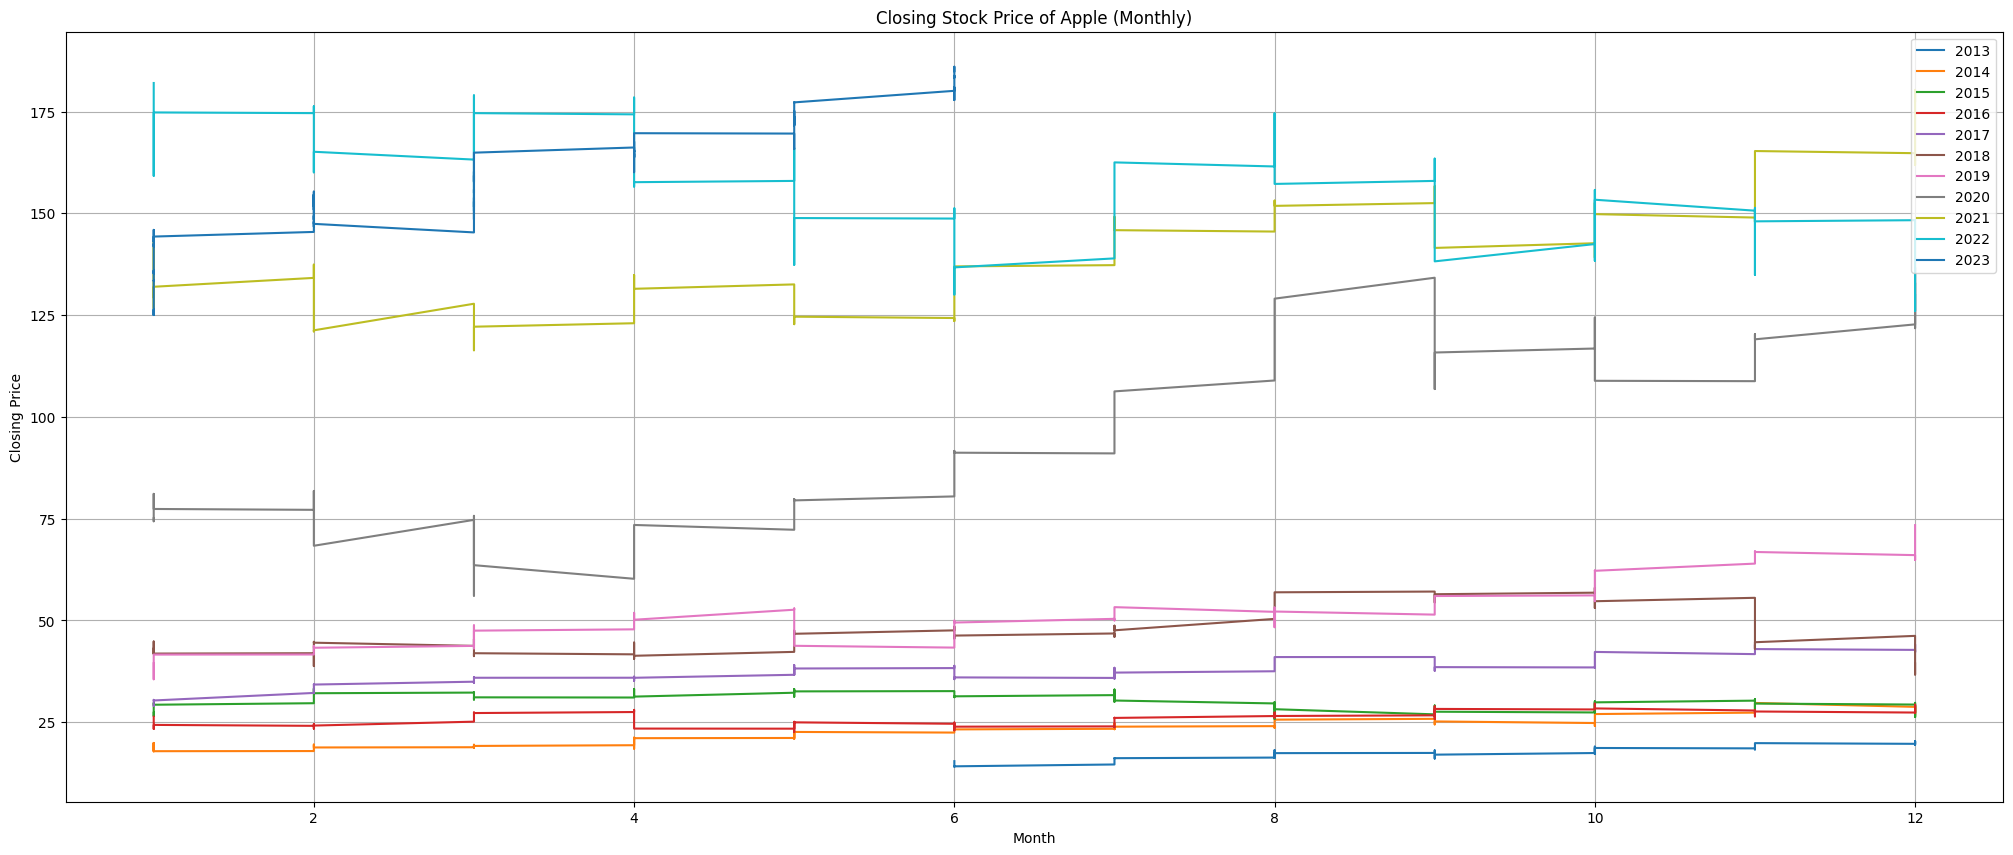

In [6]:

stock_dataset['Year'] = stock_dataset.index.year
stock_dataset['Month'] = stock_dataset.index.month
grouped_df = stock_dataset.groupby('Year')
plt.figure(figsize=(25,10))
for year, group in grouped_df:
    plt.plot(group['Month'], group['Close'], label=str(year))
plt.title('Closing Stock Price of Apple (Monthly)')
plt.xlabel('Month')
plt.ylabel('Closing Price')
plt.legend(loc='upper right')
plt.grid(True)

### Pattern in Time Series

#### **Multiplicative and Additive Time Series:**

**Multiplicative Time Series:**

 In a multiplicative time series, the trend, seasonality, and error components interact in a multiplicative manner. This means that the magnitude of the seasonal fluctuations and trend varies with the level of the data. For example, if the seasonal pattern becomes more pronounced as the data values increase, it indicates a multiplicative time series.

**Multiplicative Time Series:**
**Value = Base Level x Trend x Seasonality x Error**


**Additive Time Series:**

In an additive time series, the trend, seasonality, and error components
interact in an additive manner. This means that the seasonal fluctuations and trend are independent of the level of the data. For example, if the seasonal pattern remains consistent regardless of the data values, it indicates an additive time series.Identifying whether a time series is multiplicative or additive is crucial for appropriate modeling and forecasting.


**Additive time series: Value = Base Level + Trend + Seasonality + Error**

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [30]:
seasonal_decom_multiplicative = seasonal_decompose(stock_dataset['Close'], model='multiplicative', period=30)
trend_multiplicative = seasonal_decom_multiplicative.trend
seasonal_multiplicative = seasonal_decom_multiplicative.seasonal
residual_multiplicative = seasonal_decom_multiplicative.resid
seasonal_decom_additive = seasonal_decompose(stock_dataset['Close'], model='additive', period=30)
trend_additive=seasonal_decom_additive.trend
seasonal_additive=seasonal_decom_additive.seasonal
residual_additive=seasonal_decom_additive.resid

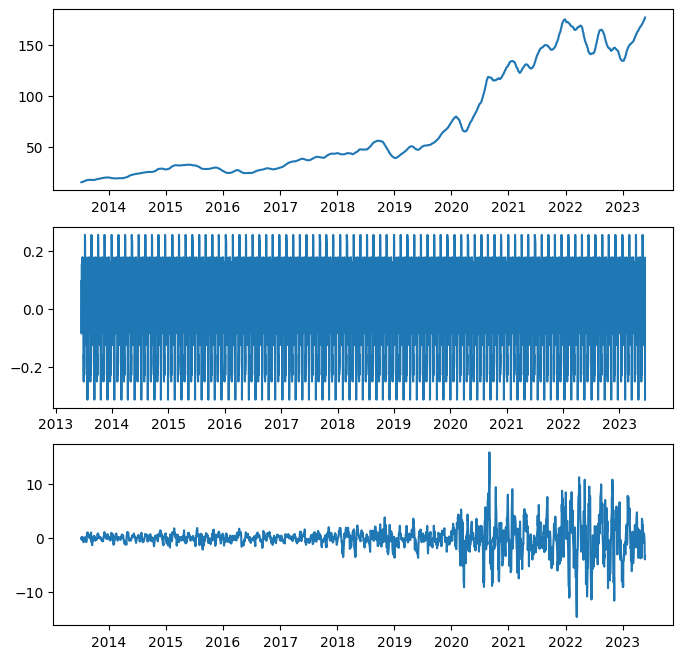

In [29]:
from statsmodels.tsa.seasonal import seasonal_decompose

#ploting
plt.figure(figsize=(15,12))
#trend
plt.subplot(3,2,1)
plt.title("Multiplication trend Graph")
plt.plot(trend_multiplicative.index, trend_multiplicative,'-')
plt.subplot(3,2,2)
plt.title("additive trend Graph")
plt.plot(trend_additive.index, trend_additive,'-')

#seasonality
plt.subplot(3,2,3)
plt.title("Multiplication Seasonality Graph")
plt.plot(seasonal_multiplicative.index, seasonal_multiplicative,'-')
plt.subplot(3,2,4)
plt.title("Multiplication trend Graph")
plt.plot(seasonal_additive.index, seasonal_additive,'-')

#residual
plt.subplot(3,2,3)

plt.plot(residual_additive.index, residual_additive,'-')

Text(0.5, 1.0, 'rolling mean and std ')

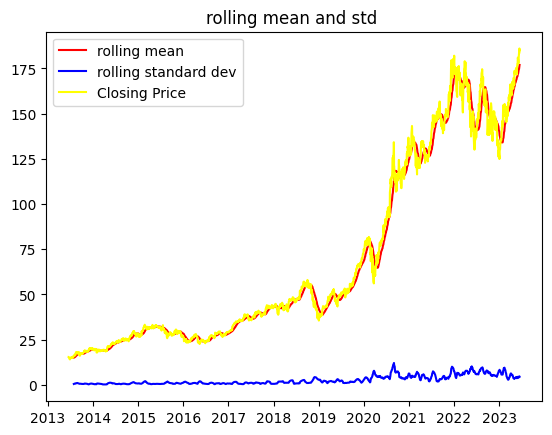

In [42]:
# plot rolling mean
#date=stock_dataset.index.to_timestamp()
rollingmean = stock_dataset['Close'].rolling(30).mean()
rollingstd = stock_dataset['Close'].rolling(30).std()
plt.title("Rolling mean and std Dev before Differencing")
plt.plot(rollingmean, color ='red', label='rolling mean')
plt.plot(rollingstd, color ='blue', label='rolling standard dev')
plt.plot(stock_dataset['Close'], color='yellow', label='Closing Price')
plt.legend(loc='best')

### **Dealing with Stationary and non-stationary Data:**


The Augmented Dickey-Fuller (ADF) test and the Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test are two commonly used statistical tests in time series analysis. They serve different purposes and provide insights into the stationarity of a time series. Here's an explanation of each test:


**Augmented Dickey-Fuller (ADF) Test:**


**Purpose:** *The ADF test is used to determine the presence of a unit root in a time series. A unit root implies that the time series is non-stationary, meaning that it exhibits trends or other time-dependent patterns.*


**Hypotheses:** *The ADF test compares the null hypothesis of a unit root against the alternative hypothesis of stationarity. The test results in a test statistic and a p-value.*


**Test Interpretation:** *If the p-value is below a chosen significance level (e.g., 0.05), then there is evidence to reject the null hypothesis of a unit root and conclude that the time series is stationary. Conversely, if the p-value is above the significance level, there is insufficient evidence to reject the null hypothesis, indicating non-stationarity.*


**Kwiatkowski-Phillips-Schmidt-Shin (KPSS) Test:**


**Purpose:** *The KPSS test is used to determine the stationarity of a time series by examining the presence of trends or other deterministic components.
Hypotheses: The KPSS test compares the null hypothesis of stationarity against the alternative hypothesis of non-stationarity. The test results in a test statistic and a p-value.*


**Test Interpretation:** *If the p-value is below a chosen significance level (e.g., 0.05), then there is evidence to reject the null hypothesis of stationarity and conclude that the time series is non-stationary. Conversely, if the p-value is above the significance level, there is insufficient evidence to reject the null hypothesis, indicating stationarity.*


In summary, the ADF test primarily focuses on detecting the presence of a unit root (non-stationarity) in a time series, while the KPSS test examines the presence of trends and other deterministic components to determine stationarity. Both tests provide valuable information for understanding the stationarity properties of a time series and are often used in conjunction to make informed decisions regarding time series modeling and analysis.

In [12]:
# checking for stationarity
from statsmodels.tsa.stattools import adfuller, kpss

# adfuller
print("ADFulelr test:")
adfuller_test = adfuller(stock_dataset['Close'], autolag='AIC')
print("Null hypothesis: Not Stationary")
print('ADF Stats: %f' % adfuller_test[0])
print('p-value: %f' % adfuller_test[1])
print('critical values:')
for key, value in adfuller_test[4].items():
  print('\t%s: %.3f' % (key, value))

print("KPSS test:")
kpss_test = kpss(stock_dataset['Close'], regression = 'c', nlags= None, store= False)
print("Null hypothesis: Not Stationary")
print('ADF Stats: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('critical values:')
for key, value in kpss_test[3].items():
  print('\t%s: %.3f' % (key, value))

ADFulelr test:
Null hypothesis: Not Stationary
ADF Stats: 0.512354
p-value: 0.985244
critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
KPSS test:
Null hypothesis: Not Stationary
ADF Stats: 7.140896
p-value: 0.010000
critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1987: FutureWarning: None is not a valid value for nlags. It must be an integer, 'auto' or 'legacy'. None will raise starting in 0.14
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


ADFulelr test:
Null hypothesis: Not Stationary
ADF Stats: -9.444409
p-value: 0.000000
critical values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
KPSS test:
Null hypothesis: Not Stationary
ADF Stats: 0.314800
p-value: 0.100000
critical values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:1987: FutureWarning: None is not a valid value for nlags. It must be an integer, 'auto' or 'legacy'. None will raise starting in 0.14
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/stattools.py:2022: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


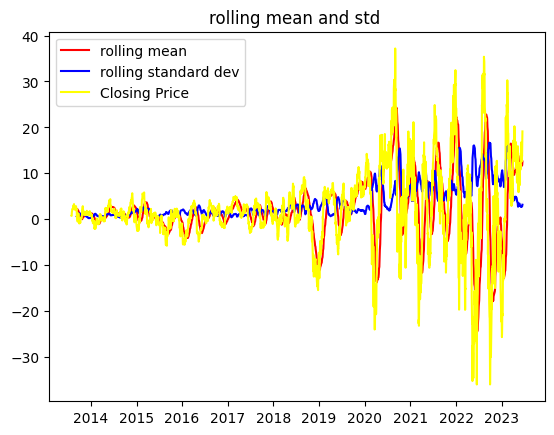

In [13]:
# detrending the dataset
stock_dataset['Closed_Detrend'] = (stock_dataset['Close'] - stock_dataset['Close'].shift(30))

#ploting rolling mean and std
rollingmean = stock_dataset['Closed_Detrend'].rolling(30).mean()
rollingstd = stock_dataset['Closed_Detrend'].rolling(30).std()
plt.title('rolling mean and std with differencing ')
plt.plot(rollingmean, color ='red', label='rolling mean')
plt.plot(rollingstd, color ='blue', label='rolling standard dev')
plt.plot(stock_dataset['Closed_Detrend'], color='yellow', label='Closing Price')
plt.legend(loc='best')


# adfuller
print("ADFulelr test:")
adfuller_test = adfuller(stock_dataset['Closed_Detrend'].dropna(), autolag='AIC')
print("Null hypothesis: Not Stationary")
print('ADF Stats: %f' % adfuller_test[0])
print('p-value: %f' % adfuller_test[1])
print('critical values:')
for key, value in adfuller_test[4].items():
  print('\t%s: %.3f' % (key, value))

print("KPSS test:")
kpss_test = kpss(stock_dataset['Closed_Detrend'].dropna(), regression = 'c', nlags= None, store= False)
print("Null hypothesis: Not Stationary")
print('ADF Stats: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])
print('critical values:')
for key, value in kpss_test[3].items():
  print('\t%s: %.3f' % (key, value))

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


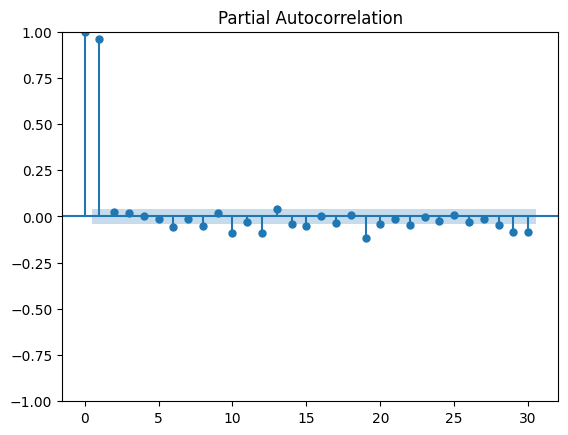

In [14]:
# PACF Plot
from statsmodels.graphics.tsaplots import plot_pacf
pacf = plot_pacf(stock_dataset['Closed_Detrend'].dropna(), lags=30)

### **ARIMA**

### Arima Model
The ARIMA (Autoregressive Integrated Moving Average) model is a popular and widely used method for time series analysis and forecasting. It combines autoregressive (AR), differencing (I), and moving average (MA) components to capture the patterns and dependencies in a time series. Here's an explanation of each component:

**Autoregressive (AR) Component:**

The AR component models the relationship between the current observation and a specified number of lagged (previous) observations.
It assumes that the current value of the time series is influenced by its own past values.
The order of the AR component, denoted by "p," represents the number of lagged observations included in the model.

**Differencing (I) Component:**

The differencing component is used to make a time series stationary by taking the difference between consecutive observations.
Differencing helps remove trends and seasonality from the data, making it easier to model and analyze.
The order of differencing, denoted by "d," represents the number of times differencing is applied to achieve stationarity.

Moving Average (MA) Component:

The MA component models the dependency between the current observation and a specified number of lagged forecast errors.
It captures the short-term fluctuations and random shocks in the time series.
The order of the MA component, denoted by "q," represents the number of lagged forecast errors included in the model.

The ARIMA model combines these components to represent the time series data. The model is denoted as ARIMA(p, d, q), where:
"p" represents the order of the autoregressive component.
"d" represents the order of differencing.
"q" represents the order of the moving average component.

The ARIMA model is estimated using historical time series data, and the parameters (p, d, q) are determined through techniques like the Akaike Information Criterion (AIC) or Bayesian Information Criterion (BIC). Once the model is fitted, it can be used to make predictions and forecast future values of the time series

In [16]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 9.8 MB/s eta 0:00:00


In [58]:
closing_price = stock_dataset['Closed_Detrend'].dropna()
#closing_price = stock_dataset['Close']
closing_price_dataset = pd.Series(closing_price.values, index=pd.to_datetime(closing_price.index))
split_ratio = int(len(closing_price_dataset) * 0.9)
train_dataset, test_dataset = closing_price_dataset[:split_ratio], closing_price_dataset[split_ratio:]

In [59]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [60]:
model_autoARIMA = auto_arima(train_dataset, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0,
                      D=0,
                      trace=True,
                      error_action='ignore',
                      suppress_warnings=True,
                      stepwise=True)
#print(model_autoARIMA.summary())
#model_autoARIMA.plot_diagnostics(figsize=(15,8))
#plt.show()

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=15495.711, Time=0.08 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=9544.412, Time=0.18 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=13176.531, Time=0.45 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=9545.670, Time=0.47 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=9545.667, Time=0.76 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=9547.639, Time=1.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=9545.023, Time=0.95 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0]          
Total fit time: 3.925 seconds


In [61]:
import statsmodels.api as sm
model = sm.tsa.arima.ARIMA(train_dataset, order=(1,0,0))
#model = sm.tsa.arima.ARIMA(train_dataset, order=(0,1,1))
fitted = model.fit()
print(fitted.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2240
Model:                 ARIMA(1, 0, 0)   Log Likelihood               -4769.511
Date:                Sun, 18 Jun 2023   AIC                           9545.023
Time:                        13:57:40   BIC                           9562.165
Sample:                             0   HQIC                          9551.281
                               - 2240                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4297      1.210      1.182      0.237      -0.941       3.800
ar.L1          0.9641      0.003    305.504      0.000       0.958       0.970
sigma2         4.1347      0.054     77.103      0.0

In [62]:
result = fitted.forecast(len(test_dataset))
conf_ins = fitted.get_forecast(len(test_dataset)).summary_frame()
ind = np.arange(len(stock_dataset['Closed_Detrend'].dropna()))
#ind = np.arange(len(stock_dataset['Close']))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


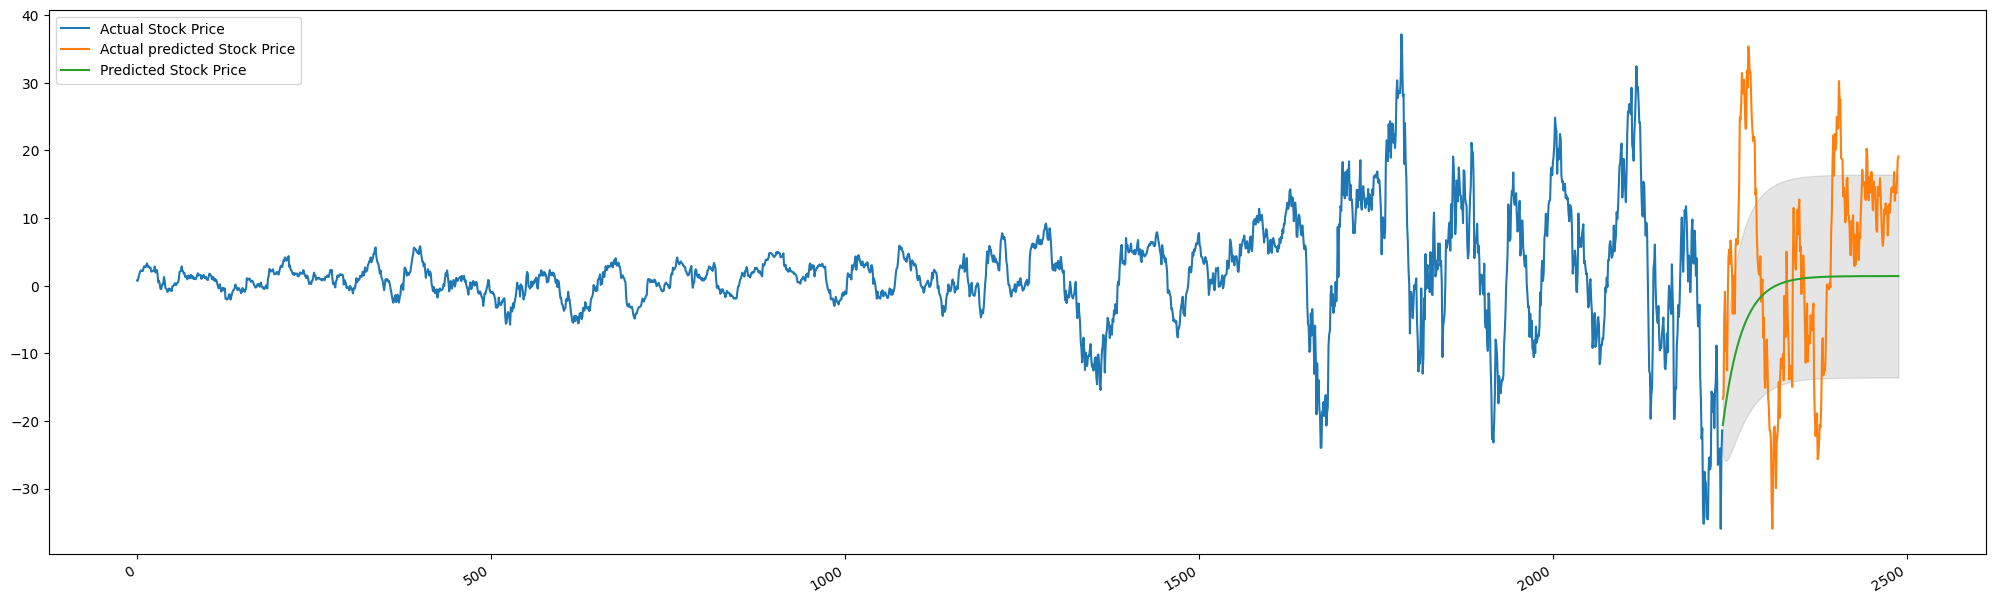

In [64]:
plt.figure(figsize=(25,8))
plt.plot(ind[:split_ratio], train_dataset.values, label='Actual Stock Price')
plt.plot(ind[split_ratio:], test_dataset.values, label='Actual predicted Stock Price')
plt.plot(ind[split_ratio:], result,label='Predicted Stock Price')
plt.fill_between(ind[split_ratio:], conf_ins['mean_ci_lower'], conf_ins['mean_ci_upper'],
                 color='k', alpha=.10)

plt.legend()
#plt.autofmt_xdate()
plt.gcf().autofmt_xdate()
plt.show()

## LSTM Approch

The Long Short-Term Memory (LSTM) model is a type of recurrent neural network (RNN) that is particularly effective for time series analysis and sequential data processing. LSTM overcomes some limitations of traditional RNNs, making it a popular choice for modeling and forecasting time series data. Here's an explanation of LSTM and its advantages over traditional RNNs:

LSTM Architecture:
**bold text**
1. LSTM networks are designed to capture long-term dependencies and handle the vanishing/exploding gradient problem encountered by traditional RNNs.

2. The key element of an LSTM is its memory cell, which maintains information over long sequences and controls the flow of information through gates.

3. LSTM has three primary gates: the input gate, the forget gate, and the output gate. These gates regulate the information flow into and out of the memory cell, allowing the LSTM to selectively remember or forget information.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

Epoch 1/10
140/140 [==============================] - 9s 15ms/step - loss: 0.0065
Epoch 2/10
140/140 [==============================] - 2s 13ms/step - loss: 2.3685e-04
Epoch 3/10
140/140 [==============================] - 2s 14ms/step - loss: 2.3453e-04
Epoch 4/10
140/140 [==============================] - 3s 18ms/step - loss: 2.1098e-04
Epoch 5/10
140/140 [==============================] - 3s 22ms/step - loss: 2.3917e-04
Epoch 6/10
140/140 [==============================] - 2s 12ms/step - loss: 2.1551e-04
Epoch 7/10
140/140 [==============================] - 2s 13ms/step - loss: 2.5252e-04
Epoch 8/10
140/140 [==============================] - 2s 13ms/step - loss: 2.2100e-04
Epoch 9/10
140/140 [==============================] - 2s 14ms/step - loss: 2.0426e-04
Epoch 10/10
9/9 [==============================] - 1s 4ms/step


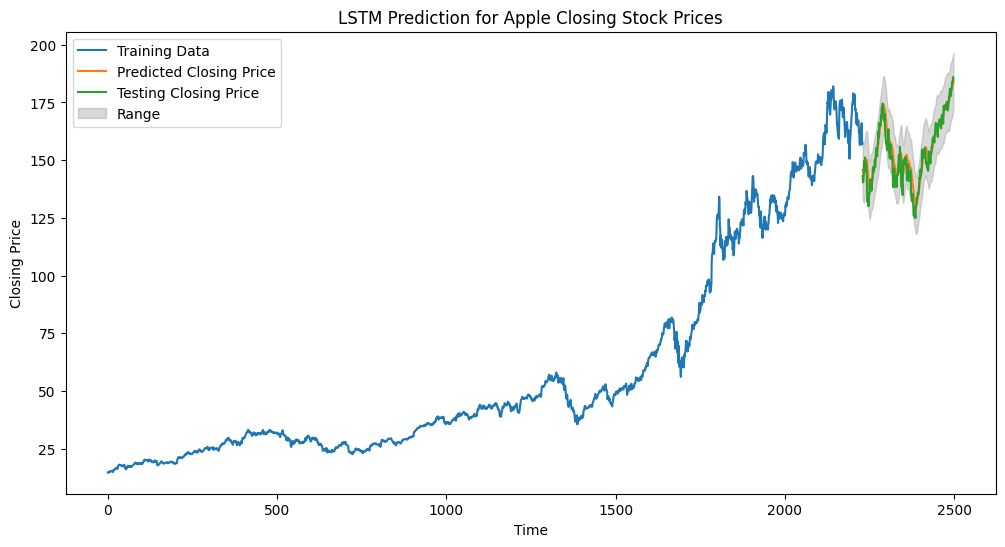

In [24]:
# Extract the 'Close' prices
close_prices = stock_dataset['Close'].values.reshape(-1, 1)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices)

# Split the data into training and testing sets
train_data = scaled_prices[:split_ratio]
test_data = scaled_prices[split_ratio:]

# Prepare the data for LSTM input
def create_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

# Define the sequence length
sequence_length = 10

# Create training sequences
X_train, y_train = create_sequences(train_data, sequence_length)

# Create testing sequences
X_test, y_test = create_sequences(test_data, sequence_length)

# Build and train the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=16)

# Generate predictions for the testing set
y_pred = model.predict(X_test)

# Inverse transform the scaled data
y_train_inverse = scaler.inverse_transform(y_train)
y_test_inverse = scaler.inverse_transform(y_test)
y_pred_inverse = scaler.inverse_transform(y_pred)

# Plot the training dataset
plt.figure(figsize=(12, 6))
plt.plot(np.arange(len(y_train_inverse)), y_train_inverse, label='Training Data')

# Plot the predicted closing price
plt.plot(np.arange(len(y_train_inverse), len(y_train_inverse) + len(y_test_inverse)), y_pred_inverse, label='Predicted Closing Price')

# Plot the testing closing price
plt.plot(np.arange(len(y_train_inverse), len(y_train_inverse) + len(y_test_inverse)), y_test_inverse, label='Testing Closing Price')

# Calculate the range of upward and downward movement
upper_bound = y_pred_inverse.flatten() + np.std(y_pred_inverse.flatten())
lower_bound = y_pred_inverse.flatten() - np.std(y_pred_inverse.flatten())

# Plot the range of upward and downward movement
plt.fill_between(np.arange(len(y_train_inverse), len(y_train_inverse) + len(y_test_inverse)), lower_bound, upper_bound, alpha=0.3, color='gray', label='Range')

plt.title('LSTM Prediction for Apple Closing Stock Prices')
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.legend()
plt.show()
